# Big Query Rai Data Acquisition and Analysis

In this notebook, we will query Rai system data from Google's Big Query and create the same datasets seen in (TheGraphDataSetCreation.ipynb)[TheGraphDataSetCreation.ipynb] with higher fidelity.


Access and libraries were was obtained by from the following tutorials:
* https://cloud.google.com/docs/authentication/getting-started#cloud-console
* https://cloud.google.com/bigquery/docs/pandas-gbq-migration

In [45]:
# import libraries
import os
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

%matplotlib inline

# constants
constant = 1000000000000000000

#defining creditionals
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/aclarkdata/Downloads/raidata-5e1723d42cf5.json'

# initializing agent
client = bigquery.Client()


In [27]:
# SQL query
sql = """
SELECT * 
FROM `blockchain-etl.ethereum_rai.ChainlinkMedianETHUSD_event_UpdateResult`
ORDER By block_timestamp DESC

"""

eth_price_OSM = client.query(sql).to_dataframe()

In [28]:
eth_price_OSM['ETH Price (OSM)'] = eth_price_OSM['medianPrice'].astype(float)/constant
del eth_price_OSM['medianPrice']
eth_price_OSM.head()

,block_timestamp,block_number,transaction_hash,log_index,contract_address,lastUpdateTime,ETH Price (OSM)
0,2021-04-13 14:28:11+00:00,12232266,0x2adb7945bafdcb06d67b7e806adeebfb48f4f90d61f7...,66,0x6a4b575ba61d2fb86ad0ff5e5be286960580e71a,1618324091,2239.828915
1,2021-04-13 13:41:48+00:00,12232074,0xb8cf221168f3658ccfcef2e6d62e5feb89d4b6bdfada...,193,0x6a4b575ba61d2fb86ad0ff5e5be286960580e71a,1618321308,2224.501146
2,2021-04-13 12:27:56+00:00,12231723,0x9dc0e54f001a87b1801ee3557dd9ff90d986ca80e842...,74,0x6a4b575ba61d2fb86ad0ff5e5be286960580e71a,1618316876,2222.139097
3,2021-04-13 11:18:19+00:00,12231423,0x19628fb49aec6785d00d0851972da4dde1d4a2e414ae...,174,0x6a4b575ba61d2fb86ad0ff5e5be286960580e71a,1618312699,2209.426995
4,2021-04-13 10:17:47+00:00,12231138,0x003eb32e52b58c658157661e25379f5629543aebd2c3...,171,0x6a4b575ba61d2fb86ad0ff5e5be286960580e71a,1618309067,2216.687085


## Time Analysis

In [49]:
eth_price_OSM['timestampDiff'] = eth_price_OSM['lastUpdateTime'].astype(float).diff() * -1
eth_price_OSM['timestampDiff'] = eth_price_OSM['timestampDiff'][1:-2]
eth_price_OSM['timestampDiff'].describe()

count    1312.000000
mean     3762.348323
std       712.715066
min       107.000000
25%      3606.000000
50%      4113.000000
75%      4198.000000
max      4804.000000
Name: timestampDiff, dtype: float64

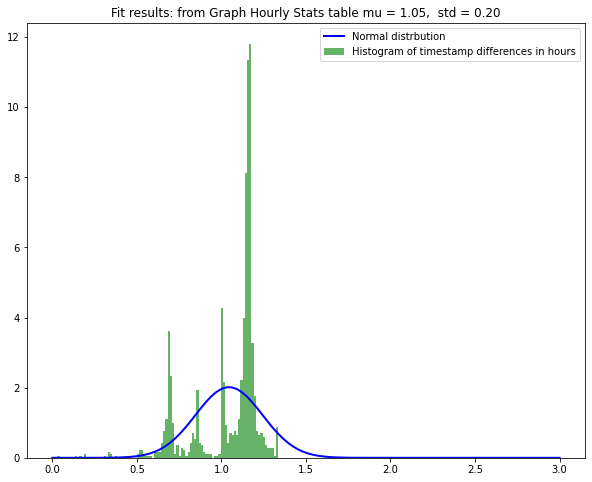

In [56]:
# convert to hours
data = eth_price_OSM.timestampDiff[1:-3].apply(lambda x: x/3600)

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(data)
plt.figure(figsize=(10, 8))
# Plot the histogram.
plt.hist(data, bins=100, density=True, alpha=0.6, color='g',label='Histogram of timestamp differences in hours')

# Plot the PDF.
x = np.linspace(0, 3, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color = 'b',label ='Normal distrbution')
title = "Fit results: from Graph Hourly Stats table mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.legend()

plt.show()

In [30]:
# SQL query
sql = """
SELECT 
* 
FROM `blockchain-etl.ethereum_rai.OracleRelayer_event_UpdateRedemptionPrice`
ORDER By block_timestamp DESC

"""

redemptionPrice = client.query(sql).to_dataframe()

redemptionPrice['RAI Redemption Price'] = redemptionPrice['redemptionPrice'].astype(float)/constant
del redemptionPrice['redemptionPrice']
redemptionPrice.head()

,block_timestamp,block_number,transaction_hash,log_index,contract_address,RAI Redemption Price
0,2021-04-13 14:09:47+00:00,12232188,0x71ae7788fc5af3b2d0d9c050f5e4fd3671b32153a0af...,6,0x4ed9c0dca0479bc64d8f4eb3007126d5791f7851,3.023308e+09
1,2021-04-13 13:11:13+00:00,12231942,0x9e591075934258cca03e9568130979133f154bb0e017...,258,0x4ed9c0dca0479bc64d8f4eb3007126d5791f7851,3.023369e+09
2,2021-04-13 12:57:52+00:00,12231877,0x1d1dd0363e8ee0c8c507aa604d15b8d38f2880246810...,224,0x4ed9c0dca0479bc64d8f4eb3007126d5791f7851,3.023382e+09
3,2021-04-13 12:09:57+00:00,12231643,0x056bef4e536aa5d18705565b7ac9e3fe4d8671dee1fc...,286,0x4ed9c0dca0479bc64d8f4eb3007126d5791f7851,3.023409e+09
4,2021-04-13 11:09:40+00:00,12231382,0xb4c1e1e49c7b52140140d65741cb887cb610348ad729...,319,0x4ed9c0dca0479bc64d8f4eb3007126d5791f7851,3.023441e+09


SELECT 
* 
FROM `blockchain-etl.ethereum_rai.OracleRelayer_event_UpdateCollateralPrice`
ORDER By block_timestamp DESC




In [58]:
sql = """
SELECT 
* 
FROM `blockchain-etl.ethereum_rai.SAFEEngine_event_UpdateAccumulatedRate`
ORDER By block_timestamp DESC
"""
globalDebt = client.query(sql).to_dataframe()
globalDebt.head()

globalDebt['globalDebt'] = globalDebt['globalDebt'].astype(float)/constant
globalDebt.head()

,block_timestamp,block_number,transaction_hash,log_index,contract_address,collateralType,surplusDst,rateMultiplier,dstCoinBalance,globalDebt
0,2021-04-13 14:19:44+00:00,12232235,0x6006af1e095c15af82dc86a4b3e365004fcedbd0ef85...,203,0xcc88a9d330da1133df3a7bd823b95e52511a6962,0x4554482d410000000000000000000000000000000000...,0xcee6aa1ab47d0fb0f24f51a3072ec16e20f90fce,1604478211960138079771,1954410385596156446352012298011180513285723917...,3.512848e+34
1,2021-04-13 14:19:44+00:00,12232235,0x6006af1e095c15af82dc86a4b3e365004fcedbd0ef85...,201,0xcc88a9d330da1133df3a7bd823b95e52511a6962,0x4554482d410000000000000000000000000000000000...,0x83533fdd3285f48204215e9cf38c785371258e76,1604478211960138079771,5425818148435190106703716357923347670201410763...,3.512842e+34
2,2021-04-13 12:54:50+00:00,12231861,0x6614bc2c410bd7df9e4eab2325c5e393b1f2e81d77e5...,108,0xcc88a9d330da1133df3a7bd823b95e52511a6962,0x4554482d410000000000000000000000000000000000...,0x83533fdd3285f48204215e9cf38c785371258e76,1665577763779080422596,5420200007489141229053871725032469061307928682...,3.516731e+34
3,2021-04-13 12:54:50+00:00,12231861,0x6614bc2c410bd7df9e4eab2325c5e393b1f2e81d77e5...,110,0xcc88a9d330da1133df3a7bd823b95e52511a6962,0x4554482d410000000000000000000000000000000000...,0xcee6aa1ab47d0fb0f24f51a3072ec16e20f90fce,1665577763779080422596,1953848571501551558587027834722092652396375709...,3.516737e+34
4,2021-04-13 11:26:42+00:00,12231460,0xda5c6271927f4b6ffa28bee1abb78ba61a605cf0ded5...,188,0xcc88a9d330da1133df3a7bd823b95e52511a6962,0x4554482d410000000000000000000000000000000000...,0x83533fdd3285f48204215e9cf38c785371258e76,1555647156030501867740,5414361448415671785458363834676704463067481281...,3.516620e+34


In [59]:
globalDebt['globalDebt']

0       3.512848e+34
1       3.512842e+34
2       3.516731e+34
3       3.516737e+34
4       3.516620e+34
            ...     
7345    2.788665e+30
7346    2.788618e+30
7347    2.788658e+30
7348    1.988509e+30
7349    1.988577e+30
Name: globalDebt, Length: 7350, dtype: float64